# <font color=#7E9397>Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos</font>


## <font color=#0FDAB1>0. EDA</font>

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? 
* ¿Cómo se relacionan las variables entre sí?
* ¿Cómo están correlacionadas las variables numéricas?

#### 0. Importación de las librerías necesarias para trabajar en la consigna.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#### 1. Carga del dataset usando las funcionalidades de Pandas. Impresión de cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# url = open("/content/drive/MyDrive/Proyecto 2/DS_Proyecto_01_Datos_Properati.csv")
df = pd.read_csv('properati.csv')

print("Filas y columnas: " + str(df.shape))
print("--------------------")

df.head()

Filas y columnas: (146660, 19)
--------------------


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
# df.describe()

####   <font color=#0FDAB1>**Extra 1:** </font>Cambio de nombre de las columnas.

In [8]:
df = df.rename(columns={"start_date": "Fecha_inicio", "end_date": "Fecha_fin", "created_on": "Creado", 
                        "lat": "Latitud", "lon": "Longitud", "l1": "Pais", "l2": "Region", "l3": "Zona", 
                        "rooms": "Hab", "bedrooms": "Dormit", "bathrooms": "Baths", "surface_total": 
                        "Sup_Total", "surface_covered": "Sup_Cubierta", "price": "Precio", "currency": "Moneda",
                        "title": "Titulo", "description": "Descripcion", "property_type": "Tipo_prop", "operation_type": "Operacion"})



## <font color=#0FDAB1>PARTE A - Transformación de Datos</font>

### 1. **Valores Faltantes**: impresión en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. 

In [9]:
print(df.shape)

miss_values_count = df.isnull().sum()  
print(miss_values_count)

print("------------------------")

(146660, 19)
Fecha_inicio        0
Fecha_fin           0
Creado              0
Latitud          9925
Longitud         9959
Pais                0
Region              0
Zona                0
Hab                 0
Dormit              0
Baths            5957
Sup_Total       20527
Sup_Cubierta    21614
Precio              0
Moneda              0
Titulo              0
Descripcion         0
Tipo_prop           0
Operacion           0
dtype: int64
------------------------


Las primeras 5 columnas no serán usadas y se descartarán. Por otro lado, de 146660 registros, se observa que casi 6000 no tienen información sobre la cantidad de baños. También hay datos faltantes en cuanto a superficie total y superficie cubierta. 
De acuerdo a esto, los registros sin información sobre el número de baños se descartará, teniendo en cuenta que no representa una gran pérdida para el dataset.

In [10]:
df = df.drop(['Fecha_inicio', 'Fecha_fin', 'Creado', 'Latitud', 'Longitud'], axis=1)

# df.head()

In [11]:
miss_values_count = df.isnull().sum()  
print(miss_values_count)

Pais                0
Region              0
Zona                0
Hab                 0
Dormit              0
Baths            5957
Sup_Total       20527
Sup_Cubierta    21614
Precio              0
Moneda              0
Titulo              0
Descripcion         0
Tipo_prop           0
Operacion           0
dtype: int64


In [12]:
print(df.shape)

df.drop(df[df.Baths.isna()].index, inplace = True)
df.shape

(146660, 14)


(140703, 14)

¿Cuánto representa, en porcentaje, los valores faltantes de superficies totales y cubiertas?

In [13]:
instancias = 140703

suptotal_miss = df.Sup_Total.isnull().sum()
suptotal_miss = suptotal_miss*100/instancias
print(suptotal_miss)

supcub_miss = df.Sup_Cubierta.isnull().sum()
supcub_miss = supcub_miss*100/instancias
print(supcub_miss)

11.813536314080013
12.35368115818426


Un poco más del 10%, por lo tanto se optará por imputar los valores faltantes. Están ambas correlacionadas? 

In [14]:
df.describe()

,Hab,Dormit,Baths,Sup_Total,Sup_Cubierta,Precio
count,140703.000000,140703.000000,140703.000000,124081.000000,123321.000000,1.407030e+05
mean,3.105819,2.006261,1.599994,213.515615,112.048954,2.392720e+05
std,1.401465,1.131694,0.889324,2019.845200,897.123415,2.897480e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.138005e+05
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.680000e+05
75%,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [15]:
corr = df[(df.Sup_Total.isnull()) & (df.Sup_Cubierta.isnull())]
corr.head()
# corr.describe()

,Pais,Region,Zona,Hab,Dormit,Baths,Sup_Total,Sup_Cubierta,Precio,Moneda,Titulo,Descripcion,Tipo_prop,Operacion
723,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,USD,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7654) Venta de Departamento 2 ...,Departamento,Venta
727,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,USD,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7651) Venta de Departamento 2 ...,Departamento,Venta
728,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,USD,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7650) Venta de Departamento 2 ...,Departamento,Venta
890,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,1.0,NaN,NaN,120000.0,USD,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7648) Venta de Departamento 3 ...,Departamento,Venta
891,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,1.0,NaN,NaN,95000.0,USD,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7655) Venta de Departamento 3 ...,Departamento,Venta


Se observa que, en general, cuando falta un dato de una de las columnas, falta también de la otra. Como no se observa una clara correlación con otras variables, se puede hipotetizar de que que la falta de esos datos se corresponde con algun factor externo. Se procede con la imputación con la media.

In [16]:
df.Sup_Total.fillna(df.Sup_Total.mean(),inplace = True)
df.Sup_Cubierta.fillna(df.Sup_Cubierta.mean(),inplace = True)

df.isnull().sum()

Pais            0
Region          0
Zona            0
Hab             0
Dormit          0
Baths           0
Sup_Total       0
Sup_Cubierta    0
Precio          0
Moneda          0
Titulo          0
Descripcion     0
Tipo_prop       0
Operacion       0
dtype: int64

### 2. **Outliers**: Rango intercuartílico

Para el manejo de outliers, se utilizará la técnica de los percentiles 25 y 75. En principio, se observará sobre qué variables aplicarla.

En este caso, se ve que las columnas correspondientes a dormitorios, baños y superficie (cubierta y total), son a las que corresponde aplicar la regla, ya que poseen algunos valores que se alejan significativamente de la media. Además, el conocimiento sobre la materia hace suponer que un inmueble con 35 habitaciones es sumamente extraño, por lo cual deberá ser tenido en cuenta de forma aislada. Lo mismo puede decirse de la cantidad de baños, o de propiedades con superficies muy extensas.

In [17]:
df.describe()

,Hab,Dormit,Baths,Sup_Total,Sup_Cubierta,Precio
count,140703.000000,140703.000000,140703.000000,140703.000000,140703.000000,1.407030e+05
mean,3.105819,2.006261,1.599994,213.515615,112.048954,2.392720e+05
std,1.401465,1.131694,0.889324,1896.788219,839.883046,2.897480e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,55.000000,49.000000,1.138005e+05
50%,3.000000,2.000000,1.000000,88.000000,75.000000,1.680000e+05
75%,4.000000,3.000000,2.000000,207.000000,112.048954,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [18]:
# Habitaciones
q25,q75 = np.percentile(df.Hab.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

mascara_hab = df[ df['Hab'] < minimo ].index
mascara_hab_2 = df[ df['Hab'] > maximo ].index

df.drop(mascara_hab, inplace=True)
df.drop(mascara_hab_2, inplace=True)
print(df.shape)

# Dormitorios
q25,q75 = np.percentile(df.Dormit.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

mascara_dor = df[ df['Dormit'] < minimo ].index
mascara_dor_2 = df[ df['Dormit'] > maximo ].index

df.drop(mascara_dor, inplace=True)
df.drop(mascara_dor_2, inplace=True)
print(df.shape)

# Superficie total
q25,q75 = np.percentile(df.Sup_Total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
# print(q25,q75,iqr, minimo, maximo)

mascara_sup = df[ df['Sup_Total'] < minimo ].index
mascara_sup_2 = df[ df['Sup_Total'] > maximo ].index

df.drop(mascara_sup, inplace=True)
df.drop(mascara_sup_2, inplace=True)
print(df.shape)

# Superficie cubierta
q25,q75 = np.percentile(df.Sup_Cubierta.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
# print(q25,q75,iqr, minimo, maximo)

mascara_cub = df[ df['Sup_Cubierta'] < minimo ].index
mascara_cub_2 = df[ df['Sup_Cubierta'] > maximo ].index

df.drop(mascara_cub, inplace=True)
df.drop(mascara_cub_2, inplace=True)
print(df.shape)

2.0 4.0 2.0 -1.0 7.0
(139297, 14)
1.0 3.0 2.0 -2.0 6.0
(139262, 14)
(133071, 14)
(128499, 14)


### 3. **Encoding**: Variables categóricas y numéricas

El preprocesamiento de los datos mediante el **encoding** es una parte fundamental del proceso. Se trata de codificar las variables, de forma tal que el modelo que se utilice posteriormente, pueda beneficiarse sobre ello. Dado que los modelos 'entienden' mejor el lenguaje de los números, se reemplazarán los valores por éstos últimos. 


Se observará, en principio, cuáles son las columnas susceptibles de ser encodeadas.

In [19]:
series = df[['Pais', 'Region', 'Zona', 'Hab', 'Dormit', 'Baths', 'Moneda', 'Tipo_prop', 'Operacion']]
# print(series)

for i in series:
    val_unicos = df[i].unique().tolist()
#     val_unicos = pd.DataFrame()
    print(i, val_unicos)

print('--------------------------------------------')
# df.Pais.unique()

Pais ['Argentina']
Region ['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste']
Zona ['Boedo', 'Palermo', 'La Plata', 'Villa Crespo', 'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto', 'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta', 'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo', 'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel', 'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás', 'Villa Urquiza', 'Vicente López', 'Parque Centenario', 'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó', 'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda', 'San Fernando', 'Puerto Madero', 'San Cristobal', 'Villa Ortuzar', 'Parque Chacabuco', 'Centro / Microcentro', 'Liniers', 'Coghlan', 'Paternal', 'Saavedra', 'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución', 'Mataderos', 'Villa Devoto', 'Parque Avellaneda', 'Esteban Echeverría', 'Lomas de Zamora', 'Almirante Brown', '

Observamos que las columnas **pais, región, zona, moneda, tipo de propiedad y tipo de operación**, podrán ser encodeadas por ser variables categóricas nominales. 
Por otro lado, las variables numéricas **habitaciones, dormitorios y baños** son variables de tipo numérica discreta, y se procederá a redondear los valores. 

Para luego poder trabajar con Regresión lineal y atributos polinómicos con el mismo dataframe, se realizará una copia del mismo, donde no se encodeará la variable Zona, dado que si se realiza mediante dummies, se corre el riesgo de que el modelo se confunda. También se intentó realizar la regresión con esta variable encodeada mediante One Hot Encoding y no dio buenos resultados. De manera tal que se eliminará de la copia.

1. Variables nominales: Para las variables nominales, se usará la librería **Categorical Encoders**. Se realizará así para evitar que el modelo 'se confunda' e interprete que hay un orden o jerarquía entre los registros, lo cual, al tratarse de zonas geográficas y tipos de propiedad, no es el caso. Posteriormente se unirán los datasets creados al dataset original.


In [20]:
!pip install category_encoders
import category_encoders as ce
masc_zona = df.Zona
masc_region = df.Region
masc_tipoprop = df.Tipo_prop

# OHE para ZONAS 
ce_ohe = ce.OneHotEncoder(use_cat_names = True)
ce_dummies_z = ce_ohe.fit_transform(masc_zona)

# OHE para REGIONES 
ce_ohe = ce.OneHotEncoder(use_cat_names = True)
ce_dummies_r = ce_ohe.fit_transform(masc_region)

# OHE para TIPO DE PROPIEDAD 
ce_ohe = ce.OneHotEncoder(use_cat_names = True)
ce_dummies_t = ce_ohe.fit_transform(masc_tipoprop)

print(ce_dummies_z.shape,
ce_dummies_r.shape,
ce_dummies_t.shape)

/Users/paulawoloszyn/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(128499, 89) (128499, 4) (128499, 10)


/Users/paulawoloszyn/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/paulawoloszyn/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
df.replace({"Argentina": 1, 'USD': 1, 'Venta': 1}, inplace=True)

# Se realiza una copia del DF para luego poder trabajarlo en la Regresión Lineal con atributos polinómicos. 
df_sin_hoe = df.copy()
df_sin_hoe

,Pais,Region,Zona,Hab,Dormit,Baths,Sup_Total,Sup_Cubierta,Precio,Moneda,Titulo,Descripcion,Tipo_prop,Operacion
1,1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,1,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,1
2,1,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,1,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,1
3,1,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,1,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,1
4,1,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,1,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,1
5,1,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,1,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,1,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,1,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,1
146656,1,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,1,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,1
146657,1,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,1,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,1
146658,1,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,1,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,1


In [22]:
df = df.join(ce_dummies_r)
df = df.join(ce_dummies_z)
df = df.join(ce_dummies_t)

df_sin_hoe = df_sin_hoe.join(ce_dummies_r)
df_sin_hoe = df_sin_hoe.join(ce_dummies_t)

df.drop(['Region', 'Zona', 'Tipo_prop'], axis=1, inplace=True)
df_sin_hoe.drop(['Region', 'Zona', 'Tipo_prop'], axis=1, inplace=True)


In [23]:
df_sin_hoe.shape

(128499, 25)

2. Variables numéricas discretas.

In [24]:
df.Hab = df.Hab.astype(int).round()
df.Dormit = df.Hab.astype(int).round()
df.Baths = df.Hab.astype(int).round()
# df.head()

df_sin_hoe.Hab = df_sin_hoe.Hab.astype(int).round()
df_sin_hoe.Dormit = df_sin_hoe.Hab.astype(int).round()
df_sin_hoe.Baths = df_sin_hoe.Hab.astype(int).round()

Ya con un dataset encodeado y limpio de valores faltantes y outliers, procederemos a entrenar un modelo que sirva de `benchmark`. En este caso se utilizará un `árbol de decisión`.

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [26]:
X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
y = df.Precio

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Average Error en Test: {mae_test}', 'Resultado anterior: 53524.83299147003')

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio en Test: {rmse_test}', 'Resultado anterior: 146092.75848556007')

Mean Average Error en Test: 35535.36153852897 Resultado anterior: 53524.83299147003
Raíz del error cuadrático medio en Test: 93550.34085178842 Resultado anterior: 146092.75848556007


In [30]:
from sklearn.model_selection import cross_val_score

score_tree_train = cross_val_score(regressor, X_train, y_train).mean()
score_tree_test = cross_val_score(regressor, X_test, y_test).mean()
print(score_tree_train)
print(score_tree_test)

0.5650043138141904
0.6524418874602811


### Conclusión: Tanto el MAE como el RMSE se vieron disminuidos en casi la midad.

## <font color=#0FDAB1>PARTE B - Modelos Avanzados</font>

Para esta sección, se utilizarán dos modelos avanzados: uno relacionado al `bagging (Random Forest)` y también una `Regresión lineal con atributos polinómicos`. Los resultados se compararán con los obtenidos anteriormente, y tambien con los resultados del proyecto 1.

#### 1. Bagging: Random Forest

In [31]:
df_r = df.copy()
# df_r

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Seleccionamos features y target.
X = df_r.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
y = df_r.Precio

# Instanciamos el modelo.
forest = RandomForestRegressor(oob_score=True)

# Separamos los datos en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fiteamos y predecimos sobre el conjunto test.
forest.fit(X_train, y_train)
y_pred_t = forest.predict(X_train)
y_pred_r = forest.predict(X_test)

In [33]:
# Calculo del error y comparación con un solo árbol de decisión.
mae_test_r = metrics.mean_absolute_error(y_test, y_pred_r)
print(f'Mean Average Error en Test: {mae_test_r}', f'Resultado anterior: {mae_test}')

rmse_test_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_r}', f'Resultado anterior: {rmse_test}')

Mean Average Error en Test: 33871.79780586296 Resultado anterior: 35535.36153852897
Raíz del error cuadrático medio en Test: 87340.5837257878 Resultado anterior: 93550.34085178842


In [34]:
scores_train_r = cross_val_score(forest, X_train, y_train)
scrores_test_r = cross_val_score(forest, X_test, y_test)

In [35]:
print("%0.2f promedio de score en train y %0.2f en test" % (scores_train_r.mean(), scrores_test_r.mean()))

0.60 promedio de score en train y 0.73 en test


Con `Random Forest` tenemos mejores resultados que con un sólo árbol de decisión.

#### 2. Linear Regression

En este caso, se entrenará una regresión lineal tanto con el dataframe sin zonas, como con ellas. A su vez, se comparará el rendimiento con los hiperparámetros por defecto como con atributos polinomiales. 

In [36]:
# Linear Regression con dataframe sin zonas.
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression()

X = df_sin_hoe.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
y = df_sin_hoe.Precio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg_1.fit(X_train, y_train)

y_test_pred_1 = reg_1.predict(X_test)

rmse_test_l = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_l}')

Raíz del error cuadrático medio en Test: 134832.9562746056


In [37]:
# Linear Regression con dataframe con zonas.
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression()

X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
y = df.Precio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg_1.fit(X_train, y_train)

y_test_pred_1 = reg_1.predict(X_test)

rmse_test_l = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_l}')

scores_test_rl = cross_val_score(reg_1, X_test, y_test)
print("%0.2f promedio de accuracy en test" % (scores_test_rl.mean()))

Raíz del error cuadrático medio en Test: 117825.71046343763
0.53 promedio de accuracy en test


A continuación y mediante un ciclo for se evaluará el rendimiento de una Regresión Lineal con polinomios de grado 2, 3 y 4. 

Para hacer más sencillo el workflow, se encuentra comentado, y los resultados impresos a continuación.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# for i in range(2,5):
#     X = df_sin_hoe.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
#     y = df_sin_hoe.Precio

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#     poly = PolynomialFeatures(degree=i)
#     X_train_new = poly.fit_transform(X_train)
#     X_test_new = poly.transform(X_test)

#     print(X_train_new.shape, X_test_new.shape)
    
#     reg_2 = LinearRegression()
#     reg_2.fit(X_train_new, y_train)
#     # print(reg_2.coef_, reg_2.intercept_)
#     y_train_pred_2 = reg_2.predict(X_train_new)
#     y_test_pred_2 = reg_2.predict(X_test_new)

#     scores_test_poly = cross_val_score(reg_2, X_test_new, y_test)
#     print("%0.2f promedio de accuracy en test" % (scores_test_poly.mean()))
    
#     rmse_test_l_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
#     print(f'Raíz del error cuadrático medio en Test: {rmse_test_l_2}', f'Resultado anterior: {rmse_test_l}')

#### Resultados parciales - Regresión lineal con atributos polinómicos:

`Polinomio grado 2 shape en train y test: (86094, 276) (42405, 276)`
- Raíz del error cuadrático medio en Test: 145809966274.51233 

Resultado anterior (regresión lineal sin zonas - peor resultado): 134832.9562746056

`Polinomio grado 3 shape en train y test: (86094, 2300) (42405, 2300)`
- Raíz del error cuadrático medio en Test: 122619799.98843193 
- Resultado anterior (regresión lineal sin zonas - peor resultado): 134832.9562746056

`Polinomio grado 4 shape en train y test: (86094, 14950) (42405, 14950)`
- Raíz del error cuadrático medio en Test: 16826039252.07844 
- Resultado anterior (regresión lineal sin zonas - peor resultado): 134832.9562746056

A continuación se observará si se puede mejorar el RMSE con la regularización de Ridge y Lasso, utilizando un polinomio de grado 3, con el que se obtuvieron mejores resultados.

In [39]:
from sklearn.linear_model import Ridge, Lasso

In [40]:
# for alpha in [10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001]:
# #for alpha in [0.001]:

#     X = df_sin_hoe.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
#     y = df_sin_hoe.Precio

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#     poly = PolynomialFeatures(degree=3)
#     X_train_new = poly.fit_transform(X_train)
#     X_test_new = poly.transform(X_test)

#     reg_ridge = Ridge(alpha= alpha)
#     reg_ridge.fit(X_train_new,y_train)
    
# #     y_train_pred_ridge = reg_ridge.predict(X_train_new)
#     y_test_pred_ridge = reg_ridge.predict(X_test_new)
    
#     rmse_test_l_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
#     print(f'Alpha : {alpha}')
#     print(f'Raíz del error cuadrático medio en Test: {rmse_test_l_3}', f'Resultado anterior: {rmse_test_l}')

In [41]:
# for alpha in [10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001]:
# #for alpha in [0.001]:

#     X = df_sin_hoe.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
#     y = df_sin_hoe.Precio

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#     poly = PolynomialFeatures(degree=3)
#     X_train_new = poly.fit_transform(X_train)
#     X_test_new = poly.transform(X_test)

#     reg_lasso = Lasso(alpha = alpha)
#     reg_lasso.fit(X_train_new,y_train)
    
#     y_train_pred_lasso = reg_lasso.predict(X_train_new)
#     y_test_pred_lasso = reg_lasso.predict(X_test_new)
    
#     rmse_test_l_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
#     print(f'Alpha : {alpha}')
#     print(f'Raíz del error cuadrático medio en Test: {rmse_test_l_3}', f'Resultado anterior: {rmse_test_l}')

El mejor resultado con regularización `Ridge` fue:
- Alpha : 10
- Raíz del error cuadrático medio en Test: 117966.66723610135 Resultado anterior: 117825.71046343763

En cambio, el mejor resultado con regularización `Lasso` fue:
- Alpha : 10
- Raíz del error cuadrático medio en Test: 117632.59226999851 Resultado anterior: 117825.71046343763

De acuerdo a lo anterior, la diferencia de sólo 200 puntos entre una regresión lineal simple y una regresión lineal con polinomial features y regularización, hace suponer que que es mejor optar por la primera opción, que optimiza los recursos y es capaz de tomar todo el dataset sin sobrecargar la memoria operativa.

### Optimización de hiperparámetros

#### 1. `Random Forest`

Durante tres días se intentó realizar tanto un Random Search como un Grid Search sobre este modelo. La elección fue dada por considerarse a ambos métodos muy certeros en su evaluación de hiperparámetros, permitiendo evaluar no sólo uno si no varios de ellos a la vez. Sin embargo, no fue posible correr dicho método ni en Jupyter, ni en Google Colab. De todas formas se deja el código utilizado para su evaluación.

Se procedió entonces a realizar una búsqueda manual, haciendo uso de herramientas vistas durante la cursada, que resultaron ser muy útiles a la hora de buscar la optimización de los hiperparámetros.

In [42]:
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import randint

# X = df_sin_hoe.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
# y = df_sin_hoe.Precio

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# parameters = {'criterion':['mae', 'mse'], 'max_depth':[2,3,4,5,6,7]}

# tree_grid = RandomForestRegressor()

# clf = GridSearchCV(tree_grid, parameters)
# clf.fit(X_train, y_train)

# clf.best_params_

In [43]:
# X = df_sin_hoe.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
# y = df_sin_hoe.Precio

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [44]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [45]:
from scipy.stats import randint
max_depth = range(2,20)
resultados = []

for i in max_depth:
    X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
    y = df.Precio

    # Instanciamos el modelo.
    forest = RandomForestRegressor(max_depth=i)

    # Separamos los datos en train y test.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Fiteamos y predecimos sobre el conjunto test.
    forest.fit(X_train, y_train)
    y_pred_r_2 = forest.predict(X_test)

    rmse_test_r_2 = np.sqrt(mean_squared_error(y_test, y_pred_r_2))
    resultados.append(rmse_test_r_2)
#     print(f'Profundidad: {i}. Raíz del error cuadrático medio en Test: {rmse_test_r_2}', f'Resultado anterior: {rmse_test_r}')
    
# scores_train_r = cross_val_score(forest, X_train, y_train)
# scrores_test_r = cross_val_score(forest, X_test, y_test)

# print("%0.2f promedio de accuracy en train y %0.2f en test" % (scores_train_r.mean(), scrores_test_r.mean()))

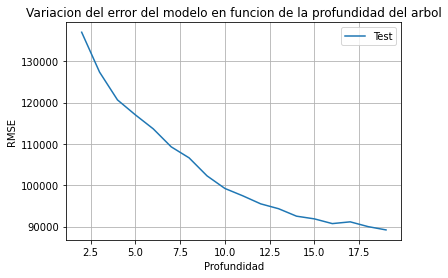

In [46]:
plt.plot(max_depth, resultados, label = 'Test')

plt.xlabel('Profundidad')
plt.ylabel('RMSE')
plt.title('Variacion del error del modelo en funcion de la profundidad del arbol')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico (El leyend agrega el cuadrito donde dice que es cada linea)
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show()

Se observa que alrededor de la profundidad 10 - 15, el bosque tiene buenos resultados. Se hipotetiza que luego ya overfitteará.

A continuación se evaluará el número de estimadores.

In [47]:
from scipy.stats import randint
n_estimators = [10,50,100,150,200,250]
resultados_2 = []

for i in n_estimators:
    X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
    y = df.Precio

    # Instanciamos el modelo.
    forest = RandomForestRegressor(n_estimators=i)

    # Separamos los datos en train y test.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Fiteamos y predecimos sobre el conjunto test.
    forest.fit(X_train, y_train)
    y_pred_r_2 = forest.predict(X_test)

    rmse_test_r_2 = np.sqrt(mean_squared_error(y_test, y_pred_r_2))
    resultados_2.append(rmse_test_r_2)

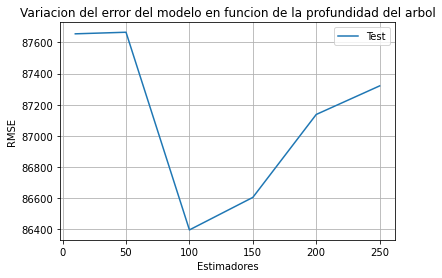

In [48]:
plt.plot(n_estimators, resultados_2, label = 'Test')

plt.xlabel('Estimadores')
plt.ylabel('RMSE')
plt.title('Variacion del error del modelo en funcion de la profundidad del arbol')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico (El leyend agrega el cuadrito donde dice que es cada linea)
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show()

Se corre nuevamente un ciclo for con el mejor número de estimadores, y dentro del rango de los mejores en profundidad, para ver el desempeño del modelo.

In [49]:
from scipy.stats import randint
max_depth = range(5,15)
resultados_3 = []

for i in max_depth:
    X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
    y = df.Precio

    # Instanciamos el modelo.
    forest = RandomForestRegressor(max_depth=i, n_estimators=200)

    # Separamos los datos en train y test.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Fiteamos y predecimos sobre el conjunto test.
    forest.fit(X_train, y_train)
    y_pred_r_2 = forest.predict(X_test)

    rmse_test_r_2 = np.sqrt(mean_squared_error(y_test, y_pred_r_2))
    resultados_3.append(rmse_test_r_2)

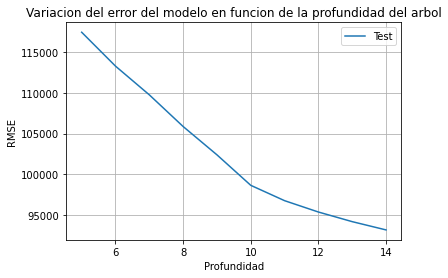

In [50]:
plt.plot(max_depth, resultados_3, label = 'Test')

plt.xlabel('Profundidad')
plt.ylabel('RMSE')
plt.title('Variacion del error del modelo en funcion de la profundidad del arbol')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico (El leyend agrega el cuadrito donde dice que es cada linea)
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show()

Se seleccionarán en este caso la profundidad 11 y 200 estimadores.

A continuación se lo comparará con los resultados obtenidos con los parámetros por defecto.

In [51]:
forest_mod = RandomForestRegressor(max_depth=11, n_estimators=200)

# Separamos los datos en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Fiteamos y predecimos sobre el conjunto test.
forest_mod.fit(X_train, y_train)
y_pred_r_mod = forest_mod.predict(X_test)

rmse_test_r_mod = np.sqrt(mean_squared_error(y_test, y_pred_r_mod))

print(f"Raíz del error cuadrático medio en Test: {rmse_test_r_mod}', Resultado original de random forest: {rmse_test_r}")
    
scores_train_r_mod = cross_val_score(forest_mod, X_train, y_train)
scrores_test_r_mod = cross_val_score(forest_mod, X_test, y_test)

print("Scores de Random Forest con optimización manual de hiperparámetros: %0.2f promedio de score en train y %0.2f en test" % (scores_train_r_mod.mean(), scrores_test_r_mod.mean()))
print("Scores de Random Forest sin optimización", "%0.2f promedio de score en train y %0.2f en test" % (scores_train_r.mean(), scrores_test_r.mean()))      

Raíz del error cuadrático medio en Test: 97033.75663255235', Resultado original de random forest: 87340.5837257878
Scores de Random Forest con optimización manual de hiperparámetros: 0.56 promedio de score en train y 0.69 en test
Scores de Random Forest sin optimización 0.60 promedio de score en train y 0.73 en test


#### 2. `Linear Regression`

Dentro de este modelo, se eligió optimizar `n_jobs`. Se utilizó un GridSearch para optimizar la búsqueda.

In [52]:
n_jobs = [1,-1,2]
scores_lr = []

for i in n_jobs:
    reg_3 = LinearRegression(n_jobs=i)

    X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
    y = df.Precio

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    reg_3.fit(X_train, y_train)

    y_test_pred_3 = reg_3.predict(X_test)

    rmse_test_l_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_3))
    print(f'Raíz del error cuadrático medio en Test: {rmse_test_l_3}', f'Resultado original: {rmse_test_l}')

    scores_test_rl_3 = cross_val_score(reg_3, X_test, y_test)
    scores_lr.append(scores_test_rl_3)
    print(f'Score original: {scores_test_rl.mean()}', "Resultado obtenido:")
    print("%0.2f promedio de score en test" % (scores_test_rl_3.mean()))

Raíz del error cuadrático medio en Test: 117825.71046343763 Resultado original: 117825.71046343763
Score original: 0.5313415700910848 Resultado obtenido:
0.53 promedio de score en test
Raíz del error cuadrático medio en Test: 117825.71046343763 Resultado original: 117825.71046343763
Score original: 0.5313415700910848 Resultado obtenido:
0.53 promedio de score en test
Raíz del error cuadrático medio en Test: 117825.71046343763 Resultado original: 117825.71046343763
Score original: 0.5313415700910848 Resultado obtenido:
0.53 promedio de score en test


In [53]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

X = df.drop(['Precio', 'Descripcion', 'Titulo'], axis=1)
y = df.Precio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

parameters = {'n_jobs':[1,-1,2]}

lineal = LinearRegression()

clf = GridSearchCV(lineal, parameters)
clf.fit(X_train, y_train)

clf.best_params_

{'n_jobs': 1}

In [54]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca = df.drop(['Descripcion', 'Titulo'], axis=1)

X = df_pca.drop(['Precio'], axis=1)
y = df_pca.Precio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# n_components = 
pca = PCA(n_components=80)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_.sum()
print(explained_variance)


# labels = {str(i): f"PC {i+1}" for i in range(n_components)}
# labels['color'] = 'Median Price'

# fig = px.scatter_matrix(
#     components,
#     color=df_pca.Precio,
#     dimensions=range(n_components),
#     labels=labels,
#     title=f'Total Explained Variance: {total_var:.2f}%',
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

0.8348739611439712


### `Resultado de modelos: Resumen`

Los modelos entrenados fueron:
1. Un árbol de decisión.
2. Random Forest Regressor.
3. Regresión lineal.

A continuación se resumen los mejores resultados de cada modelo.

In [55]:
# Arbol de decisión

print(f"Mejor resultado de un sólo árbol de decisión: {score_tree_train} en Train, {score_tree_test} en Test")

Mejor resultado de un sólo árbol de decisión: 0.5650043138141904 en Train, 0.6524418874602811 en Test


In [56]:
# Random Forest

print(f"Mejor resultado de Random Forest: {scores_train_r.mean()} en Train, {scrores_test_r.mean()} en Test")

Mejor resultado de Random Forest: 0.6034076180588502 en Train, 0.7255425064722862 en Test


In [57]:
# Regresión Lineal

print(f"Mejor resultado de Regresión Lineal: {scores_test_rl.mean()} en Test")

Mejor resultado de Regresión Lineal: 0.5313415700910848 en Test


Teniendo en cuenta los resultados anteriores, puede decirse que la mejor opción sería un `Random Forest`, que demuestra tener mejores resultados. 

## <font color=#0FDAB1>PARTE C - Interpretación de modelos y conclusión</font>

*¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Además de ver la importancia de cada atributo, también elegir algunos árboles al azar y observar qué atributos considera importantes.*

Se tomará el modelo que obtuvo mejores resultados, que en este caso fue el Random Forest, con un score de `0,72 en test`.
En principio se observará cuáles considera el modelo que fueron mejores features predictores.

In [58]:
df_forest = pd.DataFrame()
df_forest["feature_importances"] = forest.feature_importances_

In [59]:
df_forest = df_forest.sort_values(by='feature_importances', ascending=False)
df_forest.head(10)

,feature_importances
5,0.404486
102,0.130218
4,0.119856
53,0.089774
2,0.045243
13,0.040611
1,0.038098
3,0.032511
25,0.022366
8,0.015975


In [60]:
columnas = np.asarray(df.columns)
columnas[4:6]

array(['Sup_Total', 'Sup_Cubierta'], dtype=object)

De acuerdo a lo anterior, tanto la superficie total como la superficie cubierta son variables que el modelo considera muy importantes. Contrario a esto, los demás atributos no se encuentran representados en gran medida. Se observará que opinan algunos árboles al azar. 

Para ello, dentro de un ciclo for se seleccionarán 4 árboles y se imprimirán sus características particulares, y los 10 features con mayor importancia.


DecisionTreeRegressor(max_depth=14, max_features='auto', random_state=573141856)


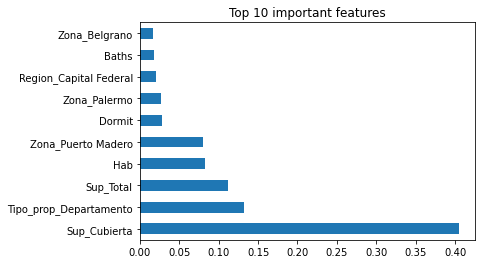

DecisionTreeRegressor(max_depth=14, max_features='auto', random_state=336662408)


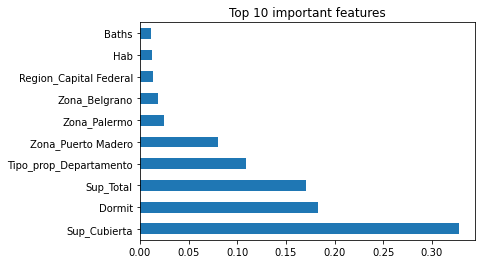

DecisionTreeRegressor(max_depth=14, max_features='auto', random_state=75676992)


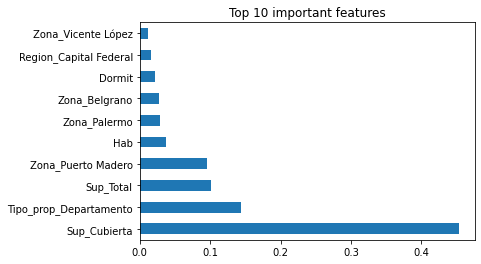

DecisionTreeRegressor(max_depth=14, max_features='auto', random_state=907378633)


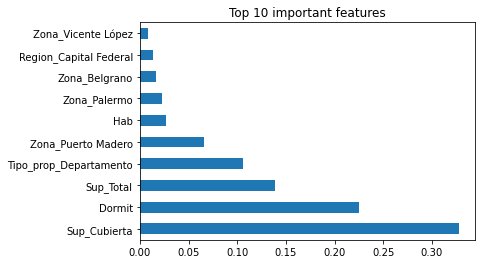

In [61]:
arboles_azar = [2,12,33,45]

for i in arboles_azar:
  arbol = forest.estimators_[i]
  print(arbol)
  feat_importances = pd.Series(arbol.feature_importances_, index=X.columns)
  feat_importances.nlargest(10).plot(kind='barh')
  plt.title("Top 10 important features")
  plt.show()

In [62]:
# print("Arbol 2: ", arbol2)
# print("Arbol 33: ",arbol33)
# print("Arbol 12: ",arbol12)

También algunas zonas resultan ser importantes para el modelo, principalmente aquellas donde hay más `departamentos`, feature que también demuestra ser muy importante. Teniendo en cuenta que son más de 100 columnas, se puede ver como son muy pocas las que realmente inciden en los resultados. De modo que quizás arroje buenos resultados un modelo donde se tengan en cuenta unas 5 variables, y se comparará con los resultados anteriores.

En este caso se seleccionarán la `superficie cubierta y total, el número de baños, dormitorios y habitaciones, y el tipo de propiedad 'Departamento'`.

In [63]:
X = df[['Sup_Cubierta', 'Sup_Total', 'Baths', 'Dormit', 'Hab', 'Tipo_prop_Departamento']]
y = df.Precio

# Instanciamos el modelo.
forest_f = RandomForestRegressor()

# Separamos los datos en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fiteamos y predecimos sobre el conjunto test.
forest_f.fit(X_train, y_train)
y_pred_t_f = forest_f.predict(X_train)
y_pred_f = forest_f.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_t_f))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_f))
print(rmse_train, rmse_test)

132588.96079732917 107603.61000651668


In [64]:
X = df[['Sup_Cubierta', 'Sup_Total', 'Baths', 'Dormit', 'Hab', 'Tipo_prop_Departamento']]
y = df.Precio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [66]:
# print(rf_random.best_estimator_)

In [67]:
X = df[['Sup_Cubierta', 'Sup_Total', 'Baths', 'Dormit', 'Hab', 'Tipo_prop_Departamento']]
y = df.Precio

# Instanciamos el modelo.
forest_x = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Separamos los datos en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fiteamos y predecimos sobre el conjunto test.
forest_x.fit(X_train, y_train)
y_pred_t_x = forest_x.predict(X_train)
y_pred_x = forest_x.predict(X_test)

print("Resultados anteriores:")
print(rmse_train, rmse_test)

print("Resultados con optimización de hiperparámetros:")
rmse_train_x = np.sqrt(mean_squared_error(y_train, y_pred_t_x))
rmse_test_x = np.sqrt(mean_squared_error(y_test, y_pred_x))
print(rmse_train_x, rmse_test_x)

Resultados anteriores:
132588.96079732917 107603.61000651668
Resultados con optimización de hiperparámetros:
135980.21258784257 107090.3821741241


In [ ]:
# Cross validation score Random Forest con y sin optimización de parámetros.

print(f"Random Forest sin optimización. Cross validation score en Train {scores_train_r.mean()}", f"Cross validation score en Test {scrores_test_r.mean()}")

scores_train_r_x = cross_val_score(forest_x, X_train, y_train)
scores_test_r_x = cross_val_score(forest_x, X_test, y_test)

print(f"Random Forest con optimización. Cross validation score en Train {scores_train_r_x.mean()}", f"Cross validation score en Test {scores_test_r_x.mean()}")

Random Forest sin optimización. Cross validation score en Train 0.6034076180588502 Cross validation score en Test 0.7255425064722862


In [ ]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = df[['Sup_Cubierta', 'Sup_Total', 'Baths', 'Dormit', 'Hab', 'Tipo_prop_Departamento']]
y = df.Precio

ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
rango = range(0,100)
estimador = []
oobs_list = []

for i in rango:
  arbol_f = forest.estimators_[i] 
  estimador.append(arbol_f)
  oobs = forest.oob_prediction_[i]
  oobs_list.append(oobs)

print(len(oobs_list))


### `Conclusión`

Al principio del preprocesamiento de los datos se realizó un encoding sobre los datos categóricos que engrosó el tamaño del dataset en casi 10 veces el tamaño original. Por ello, y especialmente por el encoding mediante One Hot Encoding de los barrios de Buenos Aires, es que las opciones para procesar la información estuvieron limitadas.

Sin embargo, es cierto que variables que a primera vista parecían importantes, como la superficie de la propiedad, y sus características intrínsecas; se convirtieron en lo que los modelos eligieron para predecir.

Después de procesar los datos en dos proyectos diferentes, puede decirse que el modelo de `Random Forest` sigue estando a la vanguardia en cuanto a resultados, y que tiene una versatilidad y rendimiento que se agradece.

Es por esto que, en conclusión, de realizarlo nuevamente, el proyecto seguiría un workflow como el que se muestra a continuación: 
1. Imputación de valores faltantes.
2. Remoción de outliers. 
3. Encoding de las variables categóricas, menos los barrios. 
4. Entrenamiento de un modelo Random Forest.
5. Optimización de sus hiperparámetros.

Y esto es por la multiplicidad de variables a tener en cuenta, donde una regresión lineal no demostró tener mejores resultados. De hecho, sus resultados fueron comparables a los de un sólo árbol de decisión. Demostrando así que para este problema en particular, los árboles rindieron mejor, y dentro de las estrategias de Bagging, el Random Forest.